# FRA Project(Milestone-1)

**PROBLEM STATEMENT** 
Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

**Data Dictionary**

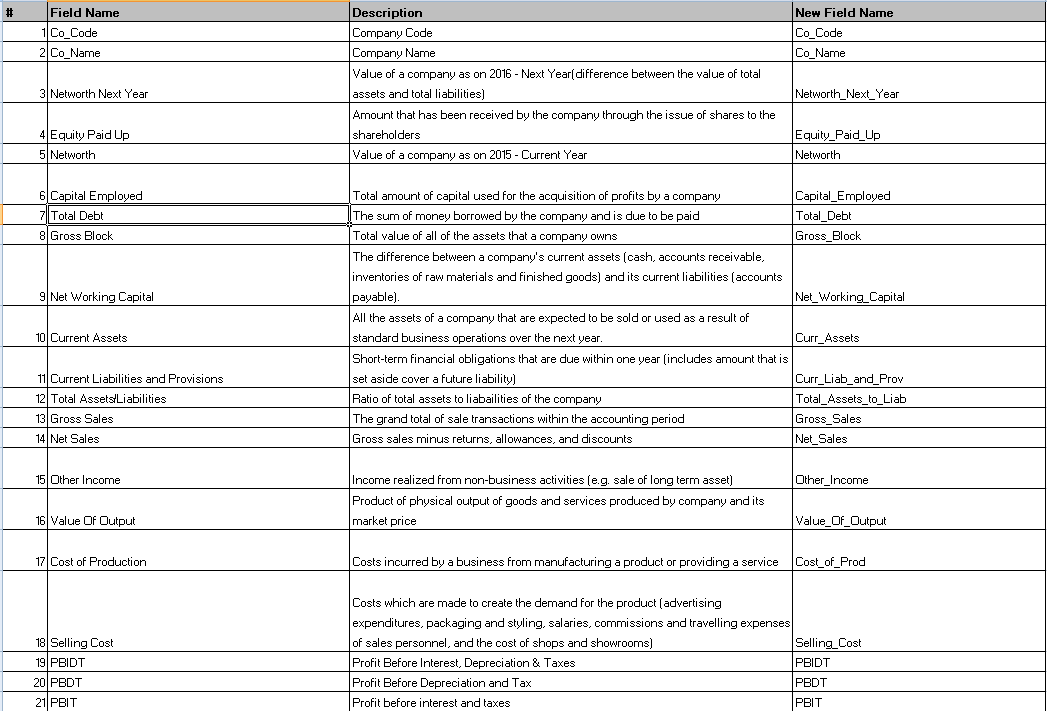
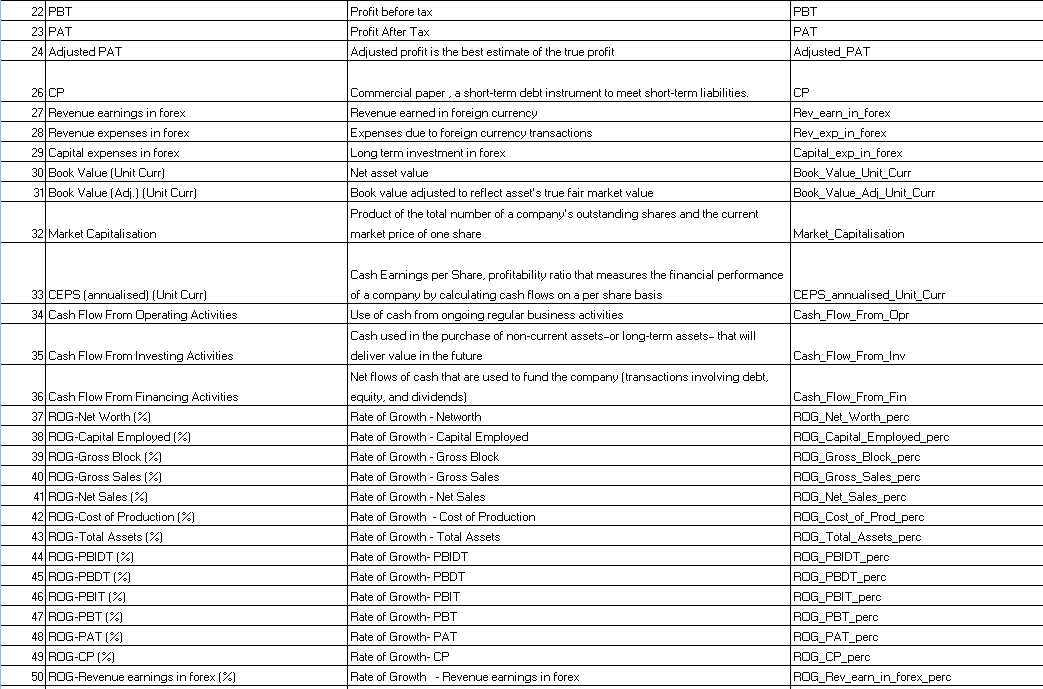
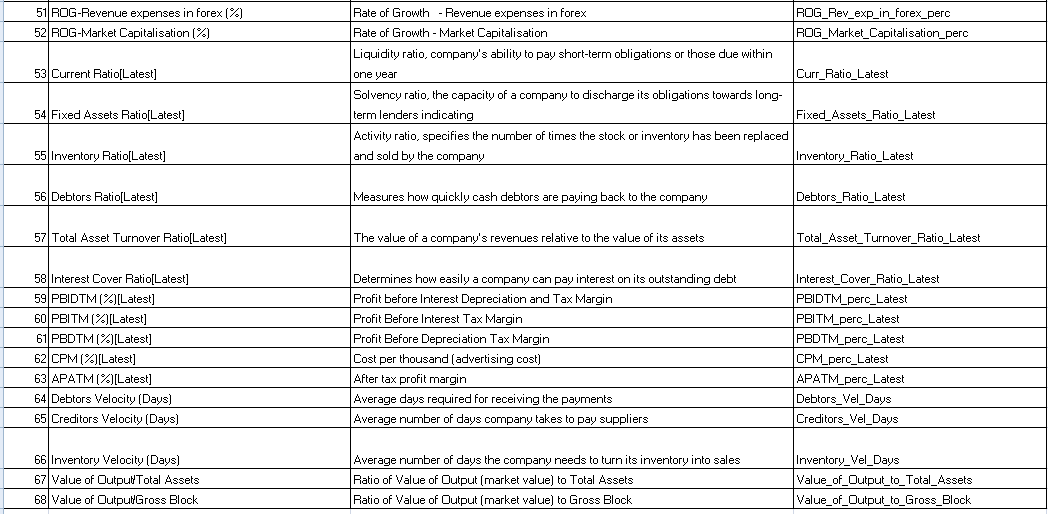

Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

**Importing the dataset**

In [123]:
DF=pd.read_excel('Company_Data2015.xlsx')

**Check the Head**

In [124]:
DF.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [125]:
DF.tail()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


**Get the info**

In [126]:
DF.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

Shape of the dataset is 3586 rows and 67 columns

We are renaming the column for best naming convention as per the column name given in the Data Dictionary

In [127]:
DF.columns = DF.columns.str.replace('%', 'Percentage').str.replace('(', ' ').str.replace(')', ' ').str.replace('[', ' ').str.replace(']', ' ').str.replace('/', ' ').str.replace('.', ' ')

<ipython-input-127-8a1546e68a90>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  DF.columns = DF.columns.str.replace('%', 'Percentage').str.replace('(', ' ').str.replace(')', ' ').str.replace('[', ' ').str.replace(']', ' ').str.replace('/', ' ').str.replace('.', ' ')


Checking top 5 rows again

In [128]:
DF.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM Percentage Latest,PBITM Percentage Latest,PBDTM Percentage Latest,CPM Percentage Latest,APATM Percentage Latest,Debtors Velocity Days,Creditors Velocity Days,Inventory Velocity Days,Value of Output Total Assets,Value of Output Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


First, let us check the number of rows (observations) and the number of columns (variables).

In [129]:
print('The number of rows (observations) is',DF.shape[0],'\n''The number of columns (variables) is',DF.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


Data types of all variables

In [130]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Co_Code                                     3586 non-null   int64  
 1   Co_Name                                     3586 non-null   object 
 2   Networth Next Year                          3586 non-null   float64
 3   Equity Paid Up                              3586 non-null   float64
 4   Networth                                    3586 non-null   float64
 5   Capital Employed                            3586 non-null   float64
 6   Total Debt                                  3586 non-null   float64
 7   Gross Block                                 3586 non-null   float64
 8   Net Working Capital                         3586 non-null   float64
 9   Current Assets                              3586 non-null   float64
 10  Current Liab

In [131]:
DF.isnull().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity  Days            0
Creditors Velocity  Days          0
Inventory Velocity  Days        103
Value of Output Total Assets      0
Value of Output Gross Block       0
Length: 67, dtype: int64

% Null values

In [132]:
DF.isnull().sum()*100/DF.shape[0]

Co_Code                         0.000000
Co_Name                         0.000000
Networth Next Year              0.000000
Equity Paid Up                  0.000000
Networth                        0.000000
                                  ...   
Debtors Velocity  Days          0.000000
Creditors Velocity  Days        0.000000
Inventory Velocity  Days        2.872281
Value of Output Total Assets    0.000000
Value of Output Gross Block     0.000000
Length: 67, dtype: float64

We noticed the object data types column in Co_Name. However, we have Co_Code. Hence, we removed the Co_Name column.

In [133]:
DF.drop('Co_Name', axis = 1, inplace = True)

In [134]:
DF.head()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM Percentage Latest,PBITM Percentage Latest,PBDTM Percentage Latest,CPM Percentage Latest,APATM Percentage Latest,Debtors Velocity Days,Creditors Velocity Days,Inventory Velocity Days,Value of Output Total Assets,Value of Output Gross Block
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [135]:
# Are there any duplicates ?
dups = DF.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
DF[dups]

Number of duplicate rows = 0


,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM Percentage Latest,PBITM Percentage Latest,PBDTM Percentage Latest,CPM Percentage Latest,APATM Percentage Latest,Debtors Velocity Days,Creditors Velocity Days,Inventory Velocity Days,Value of Output Total Assets,Value of Output Gross Block


In [136]:
DF.median()

Co_Code                         6077.500
Networth Next Year                19.015
Equity Paid Up                     8.290
Networth                          18.580
Capital Employed                  39.090
                                  ...   
Debtors Velocity  Days            49.000
Creditors Velocity  Days          39.000
Inventory Velocity  Days          35.000
Value of Output Total Assets       0.480
Value of Output Gross Block        1.530
Length: 66, dtype: float64

In [137]:
DF = DF.fillna(DF.median())

In [138]:
DF.isnull().sum()

Co_Code                         0
Networth Next Year              0
Equity Paid Up                  0
Networth                        0
Capital Employed                0
                               ..
Debtors Velocity  Days          0
Creditors Velocity  Days        0
Inventory Velocity  Days        0
Value of Output Total Assets    0
Value of Output Gross Block     0
Length: 66, dtype: int64

**Descriptive Summary:**

In [139]:
DF.describe(include='all')

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM Percentage Latest,PBITM Percentage Latest,PBDTM Percentage Latest,CPM Percentage Latest,APATM Percentage Latest,Debtors Velocity Days,Creditors Velocity Days,Inventory Velocity Days,Value of Output Total Assets,Value of Output Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3.586000e+03,3586.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.146372,-109.181500,-311.482164,-306.918935,-364.953943,603.894032,2.057855e+03,78.362242,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1794.880913,3057.209989,10920.070575,10674.661785,12498.309382,10636.759580,5.416948e+04,136.057671,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.987500,14.285000,14.100000,11.387500,7.407500,106.000000,8.900000e+01,93.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


We performed the descriptive summary for the company data. Since most of the column data is continuous, we can see the mean, standard deviation and percentile details for all the columns.

**Creating a target variable:**

**We created a target variable that takes "1" When net worth next year is negative and "0" – When net worth next year is positive**

Creating a binary Target Variable Using "Network_Next_Year" as per the business case

In [140]:
DF['default'] = np.where((DF['Networth Next Year'] > 0), 0 ,1)

Checking Top & Last 5 

In [141]:
DF[['default', 'Networth Next Year']].head(5)

,default,Networth Next Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


In [142]:
DF[['default', 'Networth Next Year']].tail(5)

,default,Networth Next Year
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


Checking proportion of default

In [143]:
DF["default"].value_counts()

0    3198
1     388
Name: default, dtype: int64

Text(0.5, 1.0, 'Proportion of target "Networth Next Year" variable')

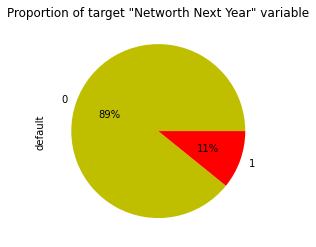

In [144]:
colors = ['y', 'r']
DF.default.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of target "Networth Next Year" variable')

In [145]:
DF.default.sum() / len(DF.default)

0.10819854991634133

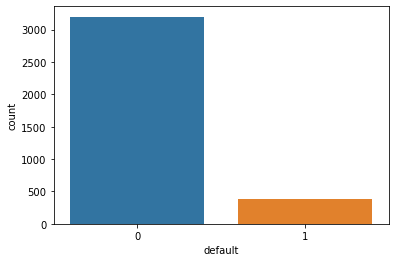

In [146]:
sns.countplot(x='default', data=DF);

In [147]:
DF.head()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBITM Percentage Latest,PBDTM Percentage Latest,CPM Percentage Latest,APATM Percentage Latest,Debtors Velocity Days,Creditors Velocity Days,Inventory Velocity Days,Value of Output Total Assets,Value of Output Gross Block,default
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


# Univariate Analysis

<AxesSubplot:>

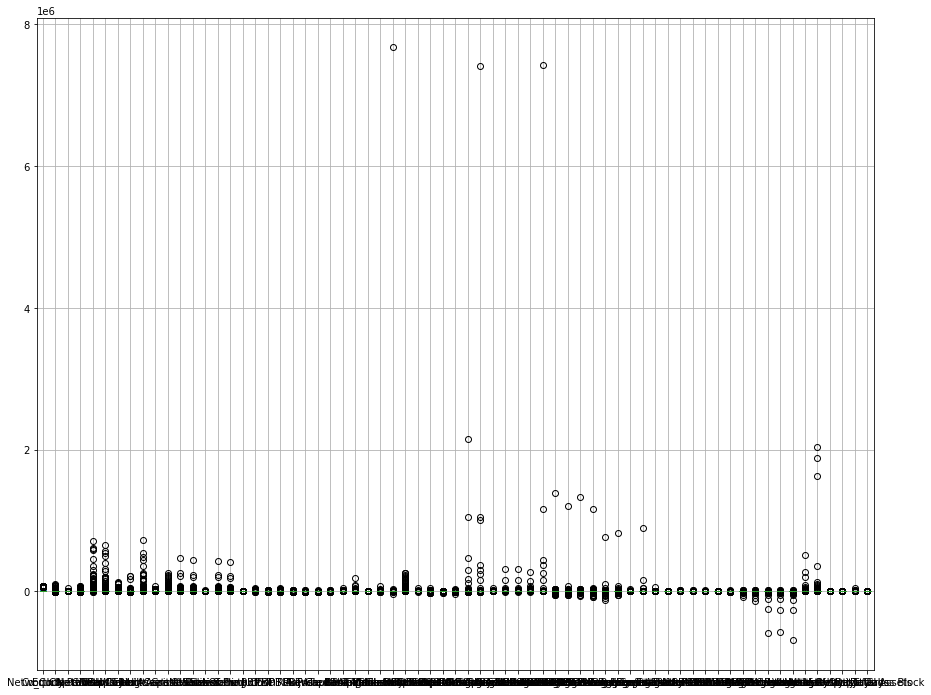

In [148]:
fig = plt.figure(figsize=(15,12))
em = pd.DataFrame(data = DF, columns = DF.columns)
DF.boxplot()

In [149]:
DF.skew().sort_values(ascending=False)

Book Value  Adj    Unit Curr     59.877217
ROG-PBIT  Percentage             58.925536
ROG-PBIDT  Percentage            58.880737
ROG-PBDT  Percentage             58.407667
ROG-PBT  Percentage              57.330567
                                   ...    
PBIDTM  Percentage  Latest      -30.935896
PBITM  Percentage  Latest       -36.002893
CPM  Percentage  Latest         -47.018189
PBDTM  Percentage  Latest       -47.756985
APATM  Percentage  Latest       -49.284357
Length: 67, dtype: float64

# Bivariate Analysis

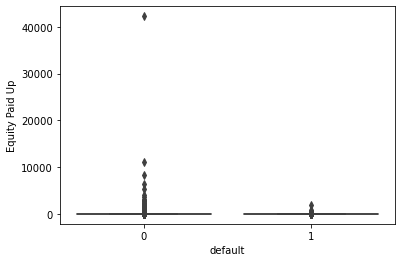

In [150]:
sns.boxplot(x="default", y = "Equity Paid Up", data=DF);

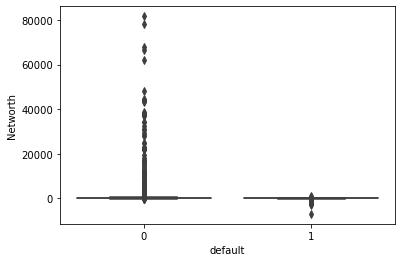

In [151]:
sns.boxplot(x="default", y = "Networth", data=DF);

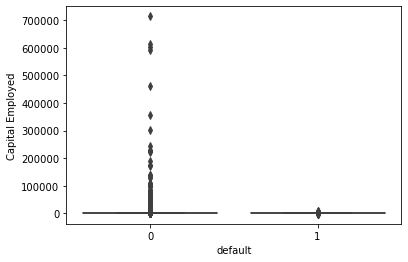

In [152]:
sns.boxplot(x="default", y = "Capital Employed", data=DF);

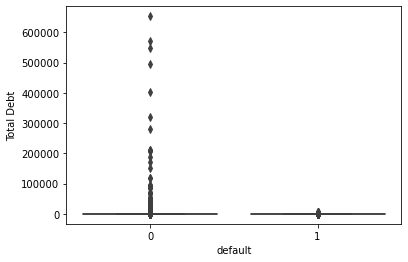

In [153]:
sns.boxplot(x="default", y = "Total Debt", data=DF);

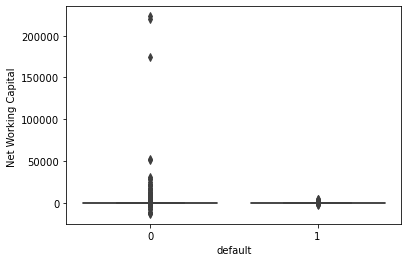

In [154]:
sns.boxplot(x="default", y = "Net Working Capital ", data=DF);

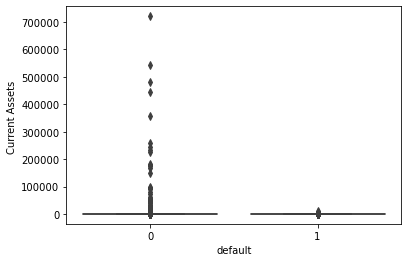

In [155]:
sns.boxplot(x="default", y = "Current Assets ", data=DF);

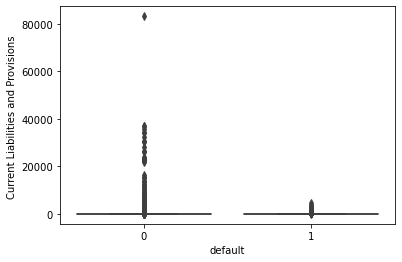

In [167]:
sns.boxplot(x="default", y = "Current Liabilities and Provisions ", data=DF);

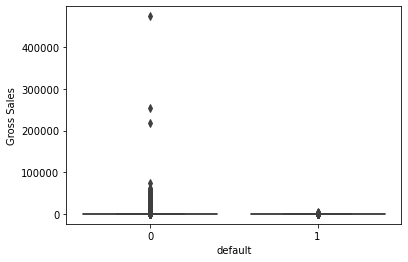

In [170]:
sns.boxplot(x="default", y = "Gross Sales", data=DF);

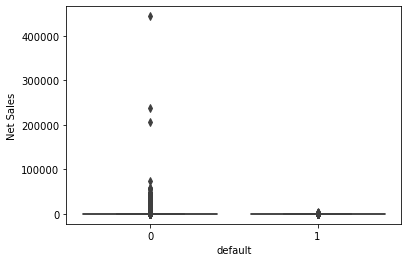

In [172]:
sns.boxplot(x="default", y = "Net Sales", data=DF);

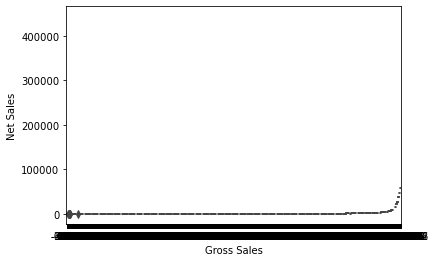

In [173]:
sns.boxplot(x="Gross Sales", y = "Net Sales", data=DF);

# Multivariate analysis

Creating dummy variables

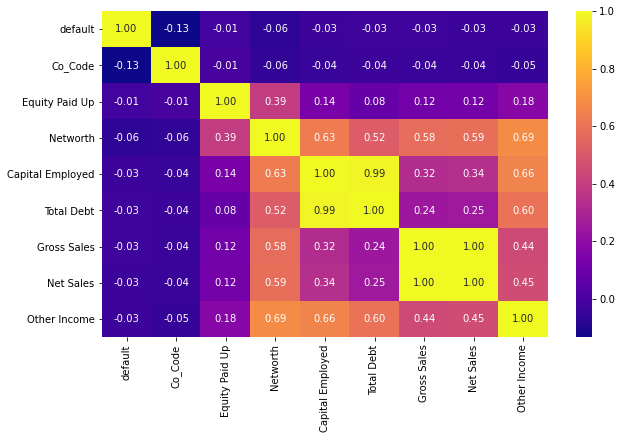

In [166]:
plt.subplots(figsize = (10,6))
sns.heatmap(DF[['default','Co_Code', 'Equity Paid Up', 'Networth','Capital Employed','Total Debt','Gross Sales','Net Sales','Other Income']] .corr(), annot = True, cmap = 'plasma', fmt = '.2f');

# Train Test Split

In [221]:
# Copy all the predictor variables into X dataframe
X = DF.drop('default', axis=1)

# Copy target into the y dataframe. 
y = DF['default']

In [222]:
# Split X and y into training and test set in 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=DF['default'])

In [223]:
y_train.value_counts(1)

0    0.891757
1    0.108243
Name: default, dtype: float64

In [224]:
y_test.value_counts(1)

0    0.891892
1    0.108108
Name: default, dtype: float64

# Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [227]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.1min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# Predicting on Training and Test dataset

In [228]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [229]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


# Model Evaluation

In [230]:
# Accuracy - Training Data
model.score(X_train, y_train)

1.0

# AUC and ROC for the training data

AUC: 1.000


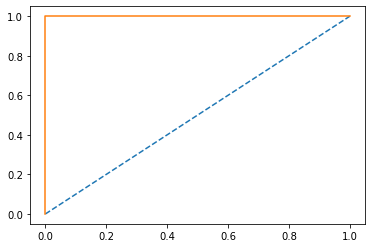

In [231]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [232]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9755067567567568

# AUC and ROC for the test data

AUC: 1.000


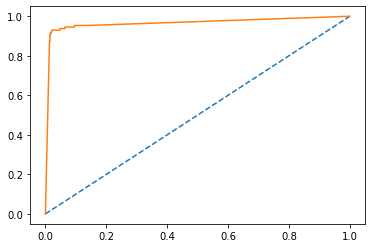

In [233]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training data

In [234]:
confusion_matrix(y_train, ytrain_predict)

array([[2142,    0],
       [   0,  260]], dtype=int64)

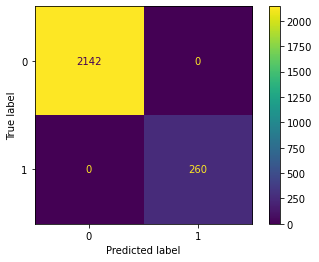

In [235]:
plot_confusion_matrix(model,X_train,y_train);

In [236]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



# Confusion Matrix for test data

In [237]:
confusion_matrix(y_test, ytest_predict)

array([[1039,   17],
       [  12,  116]], dtype=int64)

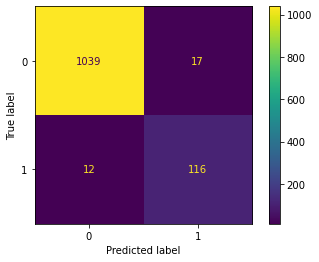

In [238]:
plot_confusion_matrix(model,X_test,y_test);

In [239]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1056
           1       0.87      0.91      0.89       128

    accuracy                           0.98      1184
   macro avg       0.93      0.95      0.94      1184
weighted avg       0.98      0.98      0.98      1184



# Applying GridSearchCV for Logistic Regression

In [240]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [241]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [244]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [245]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [246]:
best_model = grid_search.best_estimator_

In [247]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [248]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402
 



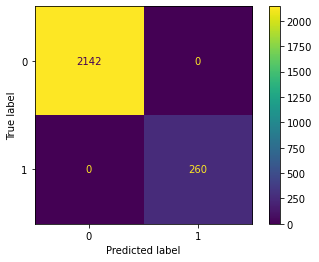

In [249]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1056
           1       0.91      0.91      0.91       128

    accuracy                           0.98      1184
   macro avg       0.95      0.95      0.95      1184
weighted avg       0.98      0.98      0.98      1184
 



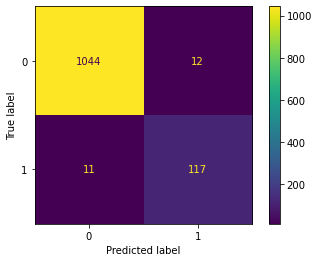

In [250]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# End